In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import arviz as az

# EXAMPLE: flatten

In [3]:
data = az.load_arviz_data('radon')
data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

## EXAMPLE: don't flatten anything

array([<AxesSubplot:xlabel='y / y\nAITKIN'>,
       <AxesSubplot:xlabel='y / y\nBELTRAMI'>], dtype=object)

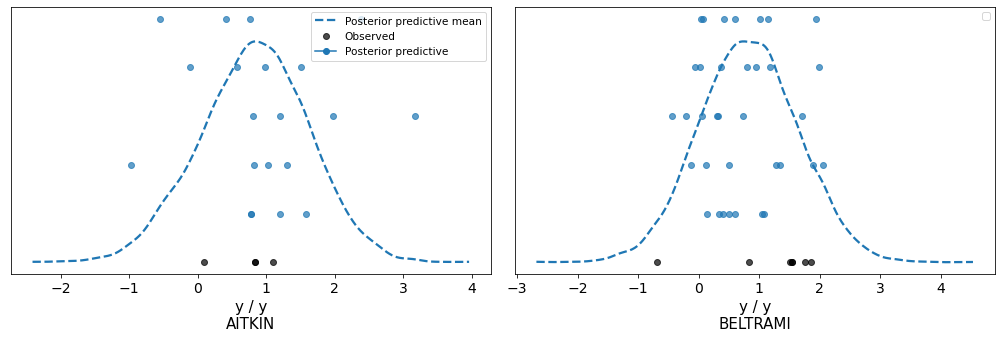

In [4]:
obs_county = data.posterior["County"][data.constant_data["county_idx"]]
data = data.assign_coords(obs_id=obs_county, groups="observed_vars")
az.plot_ppc(data, kind='scatter', flatten=[],
            coords={'obs_id': ['AITKIN', 'BELTRAMI']})

## EXAMPLE: flatten everything (default) 

<AxesSubplot:xlabel='y / y'>

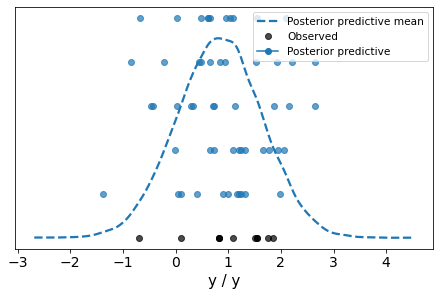

In [5]:
obs_county = data.posterior["County"][data.constant_data["county_idx"]]
data = data.assign_coords(obs_id=obs_county, groups="observed_vars")
az.plot_ppc(data, kind='scatter',
            coords={'obs_id': ['AITKIN', 'BELTRAMI']})

# TESTING

In [6]:
centered_data = az.load_arviz_data("centered_eight")
non_centered_data = az.load_arviz_data("non_centered_eight")
non_centered_data

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

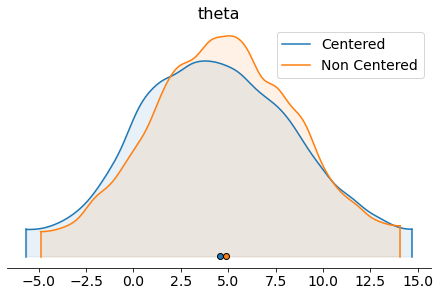

In [13]:
az.plot_density(
    [centered_data, non_centered_data],
    data_labels=["Centered", "Non Centered"],
    var_names=["theta"],
    combine_dims=['school'],
    shade=0.1,
)

array([[<AxesSubplot:title={'center':'theta\nChoate'}>,
        <AxesSubplot:title={'center':'theta\nDeerfield'}>,
        <AxesSubplot:title={'center':'theta\nPhillips Andover'}>],
       [<AxesSubplot:title={'center':'theta\nPhillips Exeter'}>,
        <AxesSubplot:title={'center':'theta\nHotchkiss'}>,
        <AxesSubplot:title={'center':'theta\nLawrenceville'}>],
       [<AxesSubplot:title={'center':"theta\nSt. Paul's"}>,
        <AxesSubplot:title={'center':'theta\nMt. Hermon'}>,
        <AxesSubplot:>]], dtype=object)

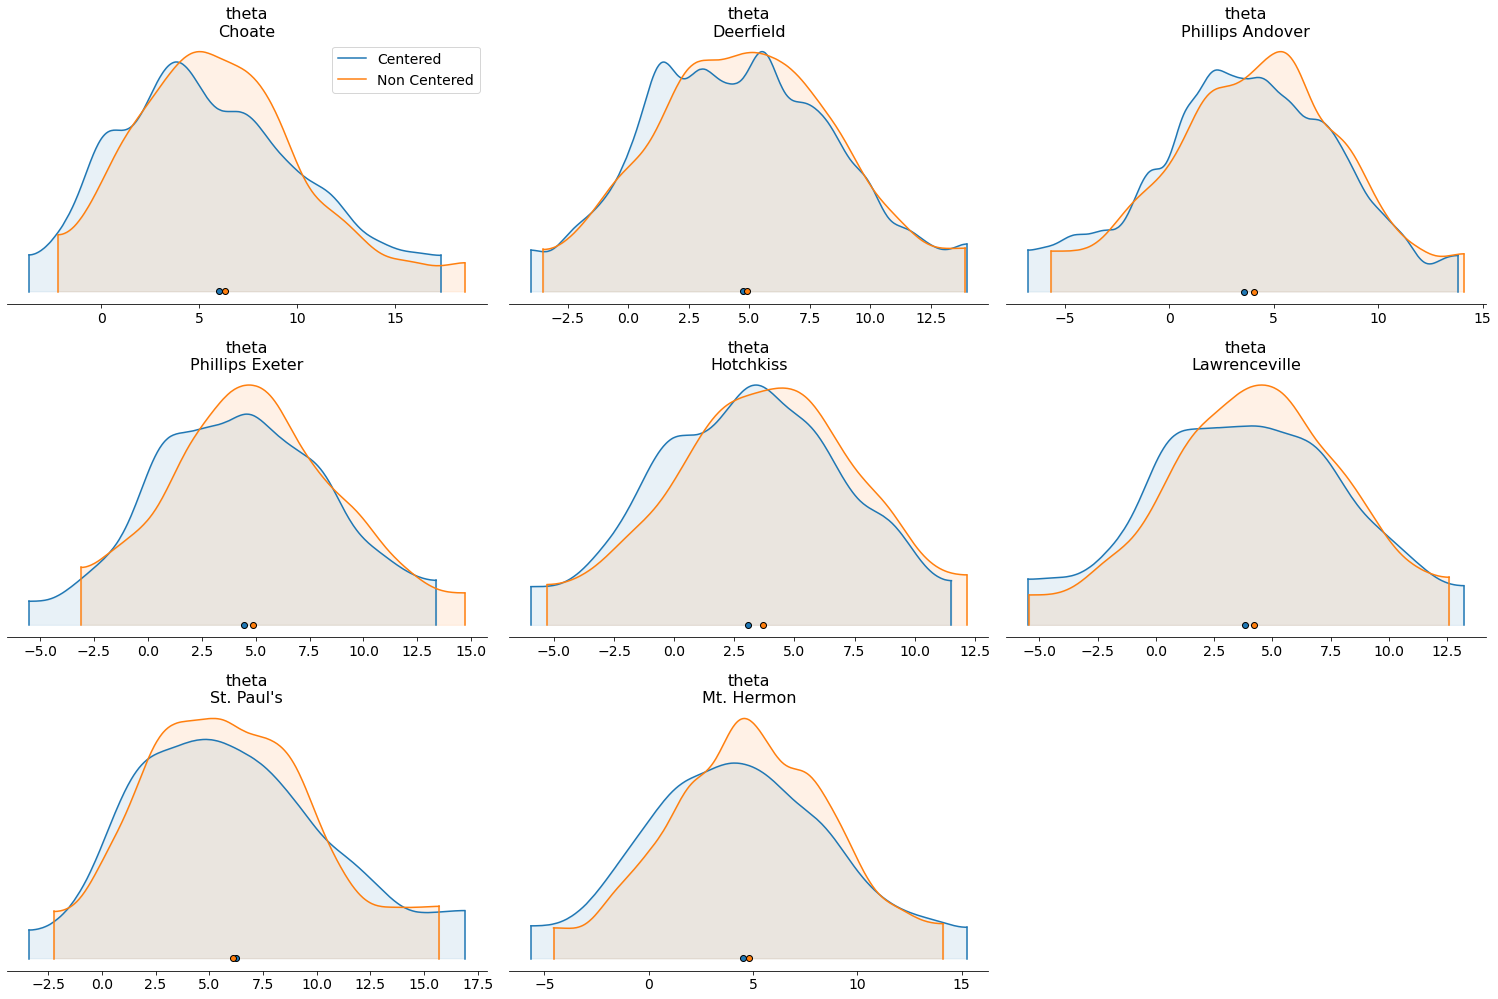

In [8]:
az.plot_density(
    [centered_data, non_centered_data],
    data_labels=["Centered", "Non Centered"],
    var_names=["theta"],
    shade=0.1,
)